# **TikTok Project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

You are a data professional at TikTok. The data team is working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and hypothesis testing.

The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. Earlier, the data team observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 5 End-of-course project: Regression modeling**


In this activity, you will build a logistic regression model in Python. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.

<br/>

**The purpose** of this project is to demostrate knowledge of EDA and regression models.

**The goal** is to build a logistic regression model and evaluate the model.
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.


# **Build a regression model**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [3]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Load the TikTok dataset.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [4]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a logistic regression model?


Checking outliers and verifying model assumptions.

### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [5]:
# Display first few rows
data.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


Get the number of rows and columns in the dataset.

In [6]:
# Get number of rows and columns
data.shape

(19382, 12)

Get the data types of the columns.

In [8]:
# Get data types of columns
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [9]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [10]:
# Generate basic descriptive stats
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [12]:
# Check for missing values
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [13]:
# Drop rows with missing values
data = data.dropna(axis=0)

In [15]:
# Display first few rows after handling missing values
data.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


Check for and handle duplicates.

In [18]:
# Check for duplicates
data.duplicated().sum()

0

Check for and handle outliers.

<Axes: xlabel='video_duration_sec'>

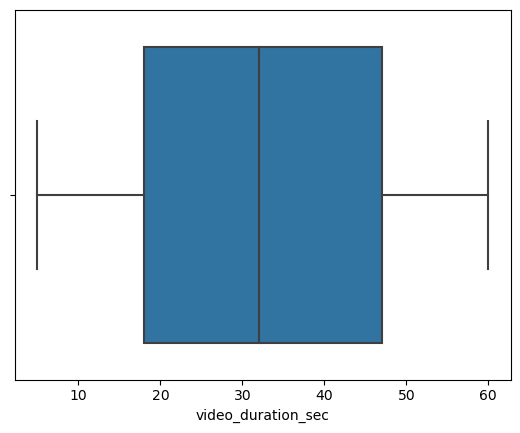

In [20]:
# Create a boxplot to visualize distribution of `video_duration_sec`
sns.boxplot(x=data['video_duration_sec'])

<Axes: xlabel='video_view_count'>

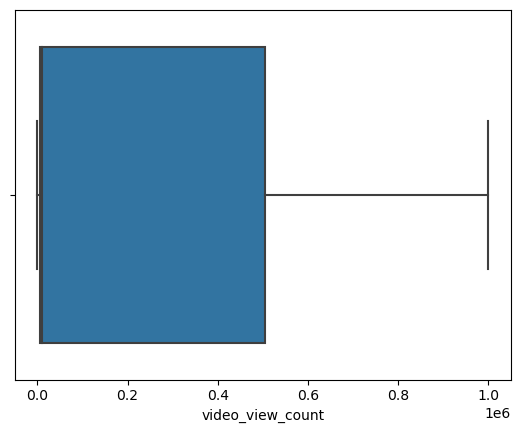

In [21]:
# Create a boxplot to visualize distribution of `video_view_count`
sns.boxplot(x=data['video_view_count'])

<Axes: xlabel='video_like_count'>

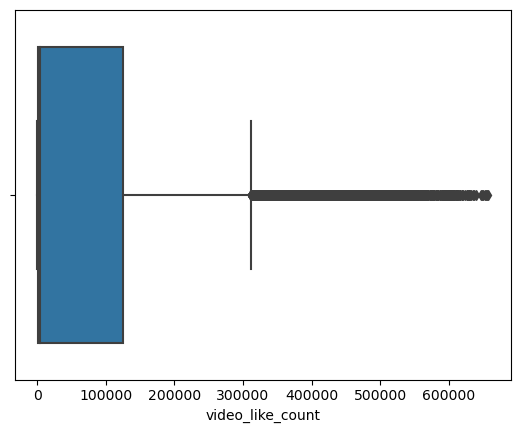

In [22]:
# Create a boxplot to visualize distribution of `video_like_count`
sns.boxplot(x=data['video_like_count'])

<Axes: xlabel='video_comment_count'>

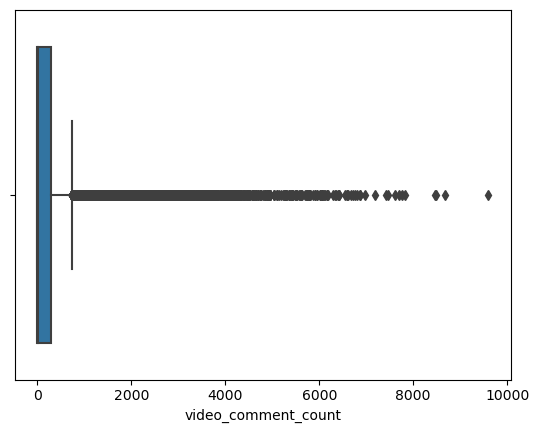

In [23]:
# Create a boxplot to visualize distribution of `video_comment_count`
sns.boxplot(x=data['video_comment_count'])

In [25]:
# Check for and handle outliers for video_like_count

# Handling by replacing ourlier values with 75p + 1.5iqr

p25 = data["video_like_count"].quantile(0.25)
p75 = data["video_like_count"].quantile(0.75)

iqr = p75 - p25

data.loc[data["video_like_count"] > p75 + 1.5 * iqr, "video_like_count"] = p75 + 1.5 * iqr

Check class balance.

In [27]:
# Check class balance for video_comment_count

data["verified_status"].value_counts(normalize=True)

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

Approximately 94.2% of the dataset represents videos posted by unverified accounts and 5.8% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Use resampling to create class balance in the outcome variable, if needed.

In [28]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes
data_majority = data[data["verified_status"] == "not verified"]
data_minority = data[data["verified_status"] == "verified"]

# Upsample the minority class (which is "verified")
data_minority_upsampled = resample(data_minority, replace=True, n_samples=len(data_majority))

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

# Display new class counts
data_upsampled["verified_status"].value_counts()

verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.



In [32]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions

data_upsampled[["verified_status", "video_transcription_text"]].groupby(by="verified_status")[["video_transcription_text"]].agg(func=lambda array: np.mean([len(text) for text in array]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.661206


Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [33]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data_upsampled["text_length"] = data_upsampled["video_transcription_text"].apply(func=lambda text: len(text))

In [34]:
# Display first few rows of dataframe after adding new column
data_upsampled.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.000,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.000,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.000,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.000,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.000,4110.0,547.0,152.0,128
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.000,62303.0,4293.0,1857.0,127
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,311333.875,193911.0,8616.0,5446.0,95
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.000,50.0,22.0,11.0,99
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.000,1050.0,53.0,27.0,103
9,11,claim,8095102436,47,someone shared with me that an average user sp...,not verified,active,695641.0,238030.000,23062.0,1719.0,378.0,83


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

<Axes: xlabel='text_length', ylabel='Count'>

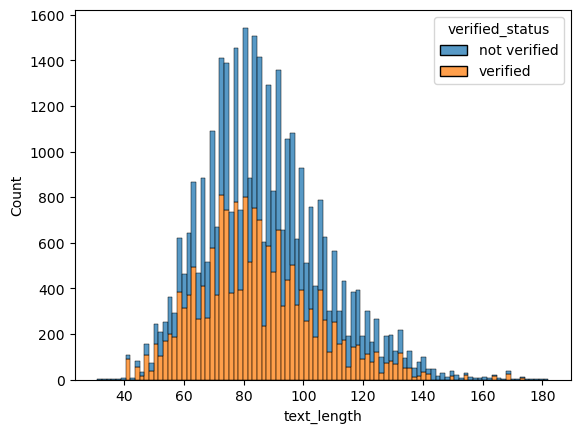

In [36]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot

sns.histplot(data=data_upsampled, stat="count", multiple="stack", x="text_length", kde=False, hue="verified_status", legend=True)


### **Task 2b. Examine correlations**

Next, code a correlation matrix to help determine most correlated variables.

In [37]:
# Code a correlation matrix to help determine most correlated variables
data_upsampled.corr(numeric_only=True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,-0.006428,-0.010227,-0.699681,-0.628263,-0.507035,-0.490571,-0.416876,-0.197857
video_id,-0.006428,1.000000,0.023961,0.010625,0.013774,0.017284,0.015154,0.019021,-0.007935
video_duration_sec,-0.010227,0.023961,1.000000,0.009152,0.003309,0.002195,0.003741,-0.004972,-0.010433
video_view_count,-0.699681,0.010625,0.009152,1.000000,0.855735,0.709562,0.691008,0.584788,0.244276
video_like_count,-0.628263,0.013774,0.003309,0.855735,1.000000,0.833382,0.807796,0.689641,0.214834
video_share_count,-0.507035,0.017284,0.002195,0.709562,0.833382,1.000000,0.709706,0.621862,0.172528
video_download_count,-0.490571,0.015154,0.003741,0.691008,0.807796,0.709706,1.000000,0.856246,0.171580
video_comment_count,-0.416876,0.019021,-0.004972,0.584788,0.689641,0.621862,0.856246,1.000000,0.149666
text_length,-0.197857,-0.007935,-0.010433,0.244276,0.214834,0.172528,0.171580,0.149666,1.000000


Visualize a correlation heatmap of the data.

<Axes: >

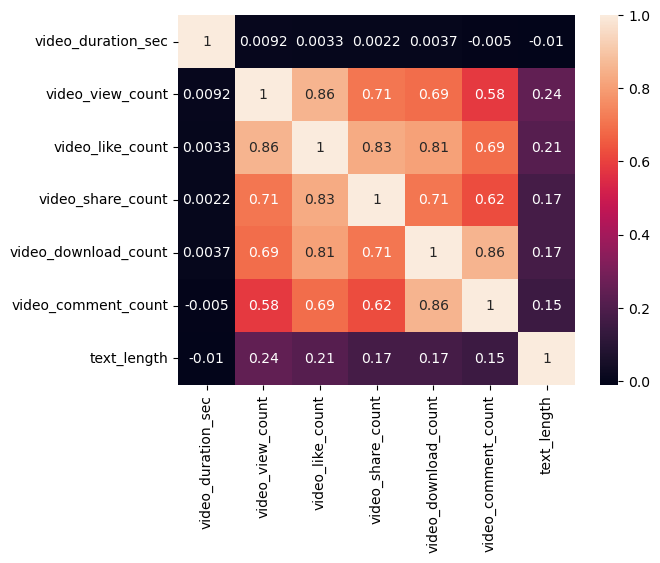

In [39]:
# Create a heatmap to visualize how correlated variables are
sns.heatmap(data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "text_length"]].corr(numeric_only=True), annot=True)


One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

**Question:** What variables are shown to be correlated in the heatmap?

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3a. Select variables**

Set your Y and X variables.

Select the outcome variable.

In [40]:
# Select outcome variable
y = data_upsampled["verified_status"]

Select the features.

In [41]:
# Select features
X = data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]

# Display first few rows of features dataframe
X.head(10)

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,claim,under review,343296.0,241.0,1.0,0.0
1,32,claim,active,140877.0,19034.0,1161.0,684.0
2,31,claim,active,902185.0,2858.0,833.0,329.0
3,25,claim,active,437506.0,34812.0,1234.0,584.0
4,19,claim,active,56167.0,4110.0,547.0,152.0
5,35,claim,under review,336647.0,62303.0,4293.0,1857.0
6,16,claim,active,750345.0,193911.0,8616.0,5446.0
7,41,claim,active,547532.0,50.0,22.0,11.0
8,50,claim,active,24819.0,1050.0,53.0,27.0
9,47,claim,active,695641.0,23062.0,1719.0,378.0


### **Task 3b. Train-test split**

Split the data into training and testing sets.

In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Confirm that the dimensions of the training and testing sets are in alignment.

In [44]:
# Get shape of each training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26826, 7), (8942, 7), (26826,), (8942,))

### **Task 3c. Encode variables**

Check the data types of the features.

In [46]:
# Check data types
X_train.dtypes

video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [49]:
# Get unique values in `claim_status`
X_train['claim_status'].unique()

array(['opinion', 'claim'], dtype=object)

In [50]:
# Get unique values in `author_ban_status`
X_train['author_ban_status'].unique()

array(['active', 'under review', 'banned'], dtype=object)

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.

In [51]:
# Select the training features that needs to be encoded
X_train_to_encode = X_train[["claim_status", "author_ban_status"]]

# Display first few rows
X_train_to_encode.head(10)

,claim_status,author_ban_status
18930,opinion,active
203,claim,active
9694,opinion,active
1218,claim,under review
16877,opinion,active
8531,claim,active
13953,opinion,active
2557,claim,active
33023,opinion,active
3398,claim,active


In [52]:
# Set up an encoder for one-hot encoding the categorical features
X_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [53]:
# Fit and transform the training features using the encoder
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

In [54]:
# Get feature names from encoder
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [56]:
# Display first few rows of encoded training features
X_train_encoded

array([[1., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 1.],
       [0., 0., 0.]])

In [58]:
# Place encoded training features (which is currently an array) into a dataframe
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
X_train_encoded_df.head(10)

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,0.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0
5,0.0,0.0,0.0
6,1.0,0.0,0.0
7,0.0,0.0,0.0
8,1.0,0.0,0.0
9,0.0,0.0,0.0


In [61]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_train.drop(columns=["claim_status", "author_ban_status"]).head(10)

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
18930,5,2604.0,383.0,19.0,3.0
203,58,629607.0,18098.0,1467.0,389.0
9694,46,4177.0,184.0,3.0,1.0
1218,32,621818.0,93456.0,5604.0,46.0
16877,19,2606.0,136.0,8.0,3.0
8531,29,119664.0,2345.0,26.0,14.0
13953,10,9269.0,62.0,2.0,1.0
2557,39,308604.0,63258.0,3480.0,1457.0
33023,28,779.0,41.0,4.0,1.0
3398,21,590067.0,11313.0,316.0,74.0


In [62]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
X_train_final = pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_train_encoded_df], axis=1)

# Display first few rows
X_train_final.head(10)

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,5,2604.0,383.0,19.0,3.0,1.0,0.0,0.0
1,58,629607.0,18098.0,1467.0,389.0,0.0,0.0,0.0
2,46,4177.0,184.0,3.0,1.0,1.0,0.0,0.0
3,32,621818.0,93456.0,5604.0,46.0,0.0,0.0,1.0
4,19,2606.0,136.0,8.0,3.0,1.0,0.0,0.0
5,29,119664.0,2345.0,26.0,14.0,0.0,0.0,0.0
6,10,9269.0,62.0,2.0,1.0,1.0,0.0,0.0
7,39,308604.0,63258.0,3480.0,1457.0,0.0,0.0,0.0
8,28,779.0,41.0,4.0,1.0,1.0,0.0,0.0
9,21,590067.0,11313.0,316.0,74.0,0.0,0.0,0.0


Check the data type of the outcome variable.

In [65]:
# Check data type of outcome variable
y_train.dtype

dtype('O')

In [66]:
# Get unique values of outcome variable
y_train.unique()

array(['verified', 'not verified'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

In [67]:
# Set up an encoder for one-hot encoding the categorical outcome variable
y_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [68]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Display the encoded training outcome variable
y_train_final

array([1., 0., 0., ..., 1., 1., 1.])

### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [69]:
# Construct a logistic regression model and fit it to the training set
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_final)

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

In [70]:
# Select the testing features that needs to be encoded
X_test_to_encode = X_test[["claim_status", "author_ban_status"]]

# Display first few rows
X_test_to_encode.head(10)

,claim_status,author_ban_status
19189,opinion,active
20535,opinion,active
21984,claim,active
20678,opinion,active
15623,opinion,active
4821,claim,active
5905,claim,under review
6273,claim,active
17630,opinion,active
15078,opinion,active


In [71]:
# Transform the testing features using the encoder
X_test_encoded = X_encoder.transform(X_test_to_encode)

# Display first few rows of encoded testing features
X_test_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 0.],
       [1., 0., 0.]])

In [72]:
# Place encoded testing features (which is currently an array) into a dataframe
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
X_test_encoded_df.head(10)

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,0.0,0.0,0.0
6,0.0,0.0,1.0
7,0.0,0.0,0.0
8,1.0,0.0,0.0
9,1.0,0.0,0.0


In [74]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_test.drop(columns=["claim_status", "author_ban_status"]).head(10)

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
19189,34,8219.0,497.0,30.0,4.0
20535,46,2921.0,89.0,4.0,1.0
21984,43,729946.0,3530.0,784.0,447.0
20678,23,4001.0,135.0,11.0,2.0
15623,59,1411.0,65.0,5.0,0.0
4821,54,672431.0,2281.0,1103.0,42.0
5905,47,840778.0,3846.0,251.0,85.0
6273,24,911556.0,79273.0,2440.0,1068.0
17630,10,6402.0,97.0,1.0,0.0
15078,7,1666.0,11.0,1.0,0.0


In [75]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
X_test_final = pd.concat([X_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_test_encoded_df], axis=1)

# Display first few rows
X_test_final.head(10)

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,34,8219.0,497.0,30.0,4.0,1.0,0.0,0.0
1,46,2921.0,89.0,4.0,1.0,1.0,0.0,0.0
2,43,729946.0,3530.0,784.0,447.0,0.0,0.0,0.0
3,23,4001.0,135.0,11.0,2.0,1.0,0.0,0.0
4,59,1411.0,65.0,5.0,0.0,1.0,0.0,0.0
5,54,672431.0,2281.0,1103.0,42.0,0.0,0.0,0.0
6,47,840778.0,3846.0,251.0,85.0,0.0,0.0,1.0
7,24,911556.0,79273.0,2440.0,1068.0,0.0,0.0,0.0
8,10,6402.0,97.0,1.0,0.0,1.0,0.0,0.0
9,7,1666.0,11.0,1.0,0.0,1.0,0.0,0.0


Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [76]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = log_clf.predict(X_test_final)

Display the predictions on the encoded testing set.

In [77]:
# Display the predictions on the encoded testing set
y_pred

array([1., 1., 0., ..., 0., 0., 1.])

Display the true labels of the testing set.

In [78]:
# Display the true labels of the testing set
y_test

19189        verified
20535        verified
21984        verified
20678        verified
15623    not verified
             ...     
29003        verified
7467     not verified
1465     not verified
4397     not verified
28225        verified
Name: verified_status, Length: 8942, dtype: object

Encode the true labels of the testing set so it can be compared to the predictions.

In [79]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# Display the encoded testing outcome variable
y_test_final

array([1., 1., 1., ..., 0., 0., 1.])

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [80]:
# Get shape of each training and testing set
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

((26826, 8), (26826,), (8942, 8), (8942,))

### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

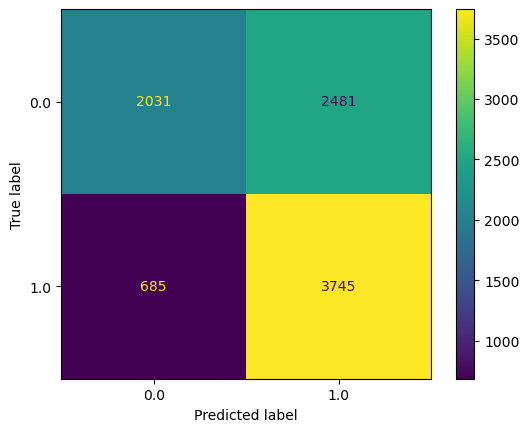

In [81]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot()


Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [82]:
# Create a classification report
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.75      0.45      0.56      4512
not verified       0.60      0.85      0.70      4430

    accuracy                           0.65      8942
   macro avg       0.67      0.65      0.63      8942
weighted avg       0.68      0.65      0.63      8942



### **Task 4c. Interpret model coefficients**

In [83]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,0.008797
1,video_view_count,-0.000002
2,video_share_count,0.000005
3,video_download_count,-0.000214
4,video_comment_count,0.000398
5,claim_status_opinion,0.000379
6,author_ban_status_banned,-0.000016
7,author_ban_status_under review,-0.000004


### **Task 4d. Conclusion**

1. What are the key takeaways from this project?

2. What results can be presented from this project?

The dataset has a few strongly correlated variables. Multicollinearity issues might arise when fitting the logistic regression model. So `video_like_count` was dropped. Based on the logistic regression model, each additional second of the video is associated with 0.009 increase in the log-odds of the user having a verified status. The logistic regression model had a precision of 61% is less than ideal, and a recall of 84% but overall accuracy is low. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 